In [2]:
!pip install bs4
!pip install graphviz
!pip install sklearn
!pip install graphviz
!pip install html5lib
import re
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=a915eba2d4cd1581c776ad6734cdb34e78b8c4a5b5a0cde50c7d051203a362da
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [3]:
def Catergorize_Gender(name):
    firstname = name[name.index(',')+2:] 
    salution = firstname.split(' ')[0]
    if(salution.upper() in ['Mr', 'Master']):
        return 1
    else:
        return 0

def Catergorize_Survival(value):
    if(value.strip() == 'nan' or '[' in value):
        return 0
    else:
        return 1

def procces_age(value):
    if('m' in value):
        return float(re.findall(r'-?\d+\.?\d*', value)[0])/12
    else:
        return float(value)

def Catergorize_Class(value):
    if('PASSENGER' in value.upper()):
        return value.split(" ")[0]
    else:
        return 'Crew'

def Categorize_dept(value):
    if('PASSENGER' in value.upper()):
        return 1
    else:
        return 0

def CattoNum(series):
    series = series.astype('category')
    d = dict(enumerate(series.cat.categories))
    print (d)
    return series.cat.codes


In [6]:
DataFile = r"C:\Users\admin\Desktop\dishwa\dmw\Practical 7\titanicdata.htm"

with open(DataFile, 'rb') as f:
    soup = BeautifulSoup(f, "html.parser")

table = soup.find('table')
data = pd.read_html(str(table), flavor='bs4')[0]
data.head(5)

,Name,Age,Class/Dept,Ticket,Joined,Job,Boat [Body],Unnamed: 7
0,"AB─½-AL-MUN├Ā, Mr N─üs─½f Q─üsim",27,3rd Class Passenger,2699£18 15s 9d,Cherbourg,NaN,15,NaN
1,"ABBING, Mr Anthony",42,3rd Class Passenger,5547£7 11s,Southampton,Blacksmith,NaN,NaN
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,CA2673£20 5s,Southampton,NaN,A,NaN
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,CA2673£20 5s,Southampton,Jeweller,[190],NaN
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,CA2673£20 5s,Southampton,Scholar,NaN,NaN


In [7]:
data['Age'] = data['Age'].map(str).apply(procces_age)
data['Name'] = data['Name'].map(str).apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))
data['Boat [Body]'] = data['Boat [Body]'].map(str).apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))
data_trim = data[['Name', 'Age', 'Class/Dept','Boat [Body]']]
print(data_trim)

                               Name   Age           Class/Dept Boat [Body]
0            AB-AL-MUN, Mr Nsf Qsim  27.0  3rd Class Passenger          15
1                ABBING, Mr Anthony  42.0  3rd Class Passenger         nan
2     ABBOTT, Mrs Rhoda Mary 'Rosa'  39.0  3rd Class Passenger           A
3        ABBOTT, Mr Rossmore Edward  16.0  3rd Class Passenger       [190]
4          ABBOTT, Mr Eugene Joseph  13.0  3rd Class Passenger         nan
...                             ...   ...                  ...         ...
2451       ZAKARIAN, Mr Mapriededer  22.0  3rd Class Passenger       [304]
2452            ZANETTI, Sig. Minio  20.0     Restaurant Staff         nan
2453             ZARRACCHI, Sig. L.  26.0     Restaurant Staff         nan
2454               ZENNI, Mr Philip  25.0  3rd Class Passenger           6
2455             ZIMMERMANN, Mr Leo  29.0  3rd Class Passenger         nan

[2456 rows x 4 columns]


In [8]:
data_trim['Gender'] = data_trim['Name'].map(str).apply(Catergorize_Gender)
data_trim.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_35368/3273522421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trim['Gender'] = data_trim['Name'].map(str).apply(Catergorize_Gender)


,Name,Age,Class/Dept,Boat [Body],Gender
0,"AB-AL-MUN, Mr Nsf Qsim",27.0,3rd Class Passenger,15,0
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,0
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,0
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],0
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,0


In [9]:
data_trim['Crew/Passenger'] = data_trim['Class/Dept'].map(str).apply(Categorize_dept)
data_trim.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_35368/1872809026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trim['Crew/Passenger'] = data_trim['Class/Dept'].map(str).apply(Categorize_dept)


,Name,Age,Class/Dept,Boat [Body],Gender,Crew/Passenger
0,"AB-AL-MUN, Mr Nsf Qsim",27.0,3rd Class Passenger,15,0,1
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,0,1
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,0,1
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],0,1
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,0,1


In [10]:
data_trim['Class'] = data_trim['Class/Dept'].apply(Catergorize_Class)
data_trim.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_35368/2296648441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trim['Class'] = data_trim['Class/Dept'].apply(Catergorize_Class)


,Name,Age,Class/Dept,Boat [Body],Gender,Crew/Passenger,Class
0,"AB-AL-MUN, Mr Nsf Qsim",27.0,3rd Class Passenger,15,0,1,3rd
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,0,1,3rd
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,0,1,3rd
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],0,1,3rd
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,0,1,3rd


In [11]:
data_trim['Survival'] = data_trim['Boat [Body]'].apply(Catergorize_Survival)
data_trim.head()

,Name,Age,Class/Dept,Boat [Body],Gender,Crew/Passenger,Class,Survival
0,"AB-AL-MUN, Mr Nsf Qsim",27.0,3rd Class Passenger,15,0,1,3rd,1
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,nan,0,1,3rd,0
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,0,1,3rd,1
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],0,1,3rd,0
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,nan,0,1,3rd,0


In [12]:
finaldata = data_trim[['Age', 'Crew/Passenger', 'Class/Dept', 'Survival', 'Gender']]
finaldata.head()

,Age,Crew/Passenger,Class/Dept,Survival,Gender
0,27.0,1,3rd Class Passenger,1,0
1,42.0,1,3rd Class Passenger,0,0
2,39.0,1,3rd Class Passenger,1,0
3,16.0,1,3rd Class Passenger,0,0
4,13.0,1,3rd Class Passenger,0,0


In [13]:
finaldata.groupby(['Crew/Passenger'])['Survival'].sum()*100/(finaldata.groupby(['Crew/Passenger'])['Survival'].count())

Crew/Passenger
0    13.586957
1    35.798817
Name: Survival, dtype: float64

In [15]:
def Compare(group, data):
    return data.groupby(['Crew/Passenger'])['Survival'].sum()*100/(finaldata.groupby(['Crew/Passenger'])['Survival'].count())
catData = finaldata[['Crew/Passenger','Class/Dept', 'Gender']].apply(CattoNum)
finaldata[['Crew/Passenger','Class/Dept', 'Gender']] = catData

# finaldata.groupby(['Crew/Passenger'])['Survival'].sum()*100/(finaldata.groupby(['Crew/Passenger'])['Survival'].count())
finaldata.head()

{0: 0, 1: 1}
{0: '1st Class Passenger', 1: '1st Class PassengerCross Channel Passenger', 2: '1st Class PassengerH&W Guarantee Group', 3: '1st Class PassengerServant', 4: '2nd Class Passenger', 5: '2nd Class PassengerCross Channel Passenger', 6: '2nd Class PassengerH&W Guarantee Group', 7: '2nd Class PassengerMusician', 8: '2nd Class PassengerServant', 9: '3rd Class Passenger', 10: 'Deck Crew', 11: 'Deck CrewTitanic Officers', 12: 'Engineering Crew', 13: 'Restaurant Staff', 14: 'Victualling Crew', 15: 'Victualling CrewPostal Clerk'}
{0: 0}


C:\Users\admin\AppData\Local\Temp/ipykernel_35368/923593674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata[['Crew/Passenger','Class/Dept', 'Gender']] = catData


,Age,Crew/Passenger,Class/Dept,Survival,Gender
0,27.0,1,9,1,0
1,42.0,1,9,0,0
2,39.0,1,9,1,0
3,16.0,1,9,0,0
4,13.0,1,9,0,0


In [16]:
trainingdata = finaldata.dropna()
len(trainingdata)

2427

In [17]:
train, test = train_test_split(trainingdata, test_size=0.2)

print("Train:",len(train))
print("Test:",len(test))

Train: 1941
Test: 486


In [18]:
clf = DecisionTreeClassifier(max_leaf_nodes=25)
clf = clf.fit(train[['Age', 'Crew/Passenger', 'Class/Dept', 'Gender']], train['Survival'])
clf

DecisionTreeClassifier(max_leaf_nodes=25)

In [19]:
clf.feature_importances_

array([0.25322612, 0.        , 0.74677388, 0.        ])

In [48]:
from sklearn import tree
with open("titanic.dot","w") as f:
    f = tree.export_graphviz(clf,feature_names=["Age","Crew/Passenger","Class/Dept","Gender"], out_file = f)
import graphviz
from graphviz import Source
s = Source.from_file("titanic.dot")
s.render()
s

In [22]:
predictions = clf.predict(test[["Age","Crew/Passenger","Class/Dept","Gender"]])
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(test["Survival"], predictions))

Accuracy: 0.779835390946502


In [23]:
# Q1: What is the survival percentage of Crew members
temp = finaldata.groupby(['Crew/Passenger'])['Survival'].sum()*100/(finaldata.groupby(['Crew/Passenger'])['Survival'].count())
print("Survival Percentage of crew:")
temp[0]

Survival Percentage of crew:


13.58695652173913

In [24]:
# Q2: What is the survival percentage of first class passengers
temp = finaldata.groupby(['Class/Dept'])['Survival'].sum()*100/(finaldata.groupby(['Class/Dept'])['Survival'].count())
print("Survival Percentage of 1st Class Passengers:")
temp[0]

Survival Percentage of 1st Class Passengers:


60.48951048951049

Survival percentage by Age:


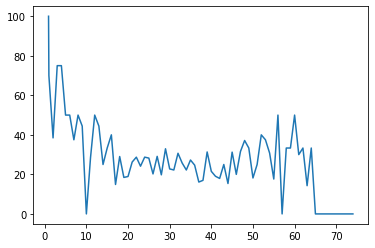

In [27]:
# Does age also play a role in survival ? How can you say that
temp = finaldata.groupby(['Age'])['Survival'].sum()*100/(finaldata.groupby(['Age'])['Survival'].count())
print("Survival percentage by Age:")
temp
import matplotlib.pyplot as plt
plt.plot(temp)